In [31]:
library("dplyr")
library("ggplot2")


Warning message:
“package ‘rowr’ is not available (for R version 3.6.1)”

In [59]:
setwd("~/smallRNAs/julia/short/map/M4")
M4<- read.table("1_coverage.bed", header=FALSE,sep="\t")

In [60]:
#chromosome data
setwd("~/piRNA/Workspaces/julia/PrimaryData/ref_data/human")
chromosome_data<- read.table("summary_chroms.tsv", header=TRUE)

In [61]:
names(M4)[names(M4) == "V1"]<- "REFSEQ_CHROM"

In [63]:
coverage_M4<-merge(M4, chromosome_data, by= "REFSEQ_CHROM")
head(coverage_M4)
names(coverage_M4)[names(coverage_M4) == "V2"]<- "position"
names(coverage_M4)[names(coverage_M4) == "V3"]<- "coverage"
head(coverage_M4)

REFSEQ_CHROM,V2,V3,CHROM,UCSC_CHROM,NCBI_CHROM
NC_000001.11,16840,17,1,chr1,GCF_000001305.15
NC_000001.11,16841,17,1,chr1,GCF_000001305.15
NC_000001.11,16842,17,1,chr1,GCF_000001305.15
NC_000001.11,16843,17,1,chr1,GCF_000001305.15
NC_000001.11,16844,17,1,chr1,GCF_000001305.15
NC_000001.11,16845,17,1,chr1,GCF_000001305.15


REFSEQ_CHROM,position,coverage,CHROM,UCSC_CHROM,NCBI_CHROM
NC_000001.11,16840,17,1,chr1,GCF_000001305.15
NC_000001.11,16841,17,1,chr1,GCF_000001305.15
NC_000001.11,16842,17,1,chr1,GCF_000001305.15
NC_000001.11,16843,17,1,chr1,GCF_000001305.15
NC_000001.11,16844,17,1,chr1,GCF_000001305.15
NC_000001.11,16845,17,1,chr1,GCF_000001305.15


In [64]:
data_new<- coverage_M4[,-c(1,5,6)]

In [65]:
head(data_new)

position,coverage,CHROM
16840,17,1
16841,17,1
16842,17,1
16843,17,1
16844,17,1
16845,17,1


In [66]:
#Precursors
data_precursors<- read.table("piRNA_prec.bed", header=FALSE)
names(data_precursors)[names(data_precursors) == "V1"]<- "UCSC_CHROM"
data_precursors<- data_precursors[,(-4)]
head(data_precursors)

UCSC_CHROM,V2,V3,V5
chr1,1496227,1509964,Prepachytene
chr11,8040790,8127654,Prepachytene
chr6,34857041,35059190,Prepachytene
chr6,38136226,38607700,Prepachytene
chr6,41757633,41861898,Prepachytene
chr6,41765382,41863099,Prepachytene


In [138]:
chr1_coverage<- data_new %>% filter(CHROM %in% c("1","2"))
chr1_pre<- data_precursors %>% filter(UCSC_CHROM %in% c("chr1","chr2"))

In [139]:
chr1_data_both <- bind_rows(chr1_pre,chr1_coverage,.id = "df_id")
head(chr1_data_both)


df_id,UCSC_CHROM,V2,V3,V5,position,coverage,CHROM
1,chr1,1496227,1509964,Prepachytene,NA,NA,NA
1,chr1,1592939,1624167,Prepachytene,NA,NA,NA
1,chr1,145209670,145293590,Prepachytene,NA,NA,NA
1,chr1,173837220,173855774,Prepachytene,NA,NA,NA
1,chr1,173837220,173872687,Prepachytene,NA,NA,NA
1,chr2,95421130,95481205,Prepachytene,NA,NA,NA


In [140]:
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"
head(chr1_data_both)

df_id,UCSC_CHROM,start,end,V5,position,coverage,CHROM
1,chr1,1496227,1509964,Prepachytene,NA,NA,NA
1,chr1,1592939,1624167,Prepachytene,NA,NA,NA
1,chr1,145209670,145293590,Prepachytene,NA,NA,NA
1,chr1,173837220,173855774,Prepachytene,NA,NA,NA
1,chr1,173837220,173872687,Prepachytene,NA,NA,NA
1,chr2,95421130,95481205,Prepachytene,NA,NA,NA


Warning message:
“Removed 26 rows containing missing values (`geom_line()`).”Warning message:
“Removed 49860 rows containing missing values (`geom_point()`).”

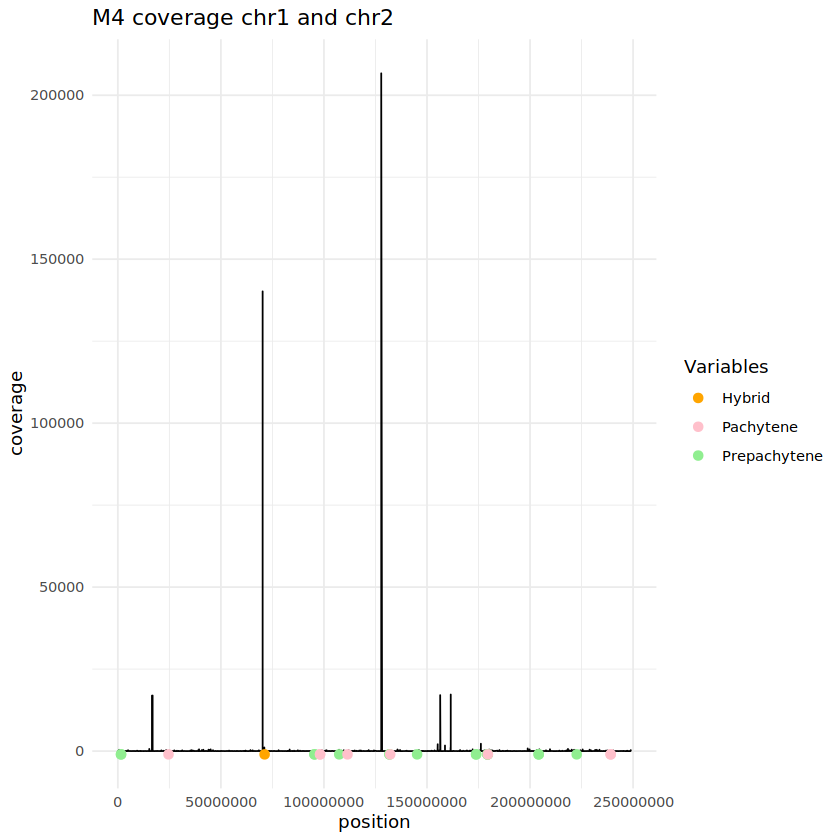

In [141]:
ggplot(chr1_data_both, aes(position, coverage)) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-1000, colour = factor(V5)),size=2.3)+
  theme_minimal()+
  scale_colour_manual(name="Variables", values=color)+
  ggtitle("M4 coverage chr1 and chr2")

In [142]:
chr1_coverage<- data_new %>% filter(CHROM %in% c("3","4"))
chr1_pre<- data_precursors %>% filter(UCSC_CHROM %in% c("chr3","chr4"))

In [143]:
chr1_data_both <- bind_rows(chr1_pre,chr1_coverage,.id = "df_id")
head(chr1_data_both)


df_id,UCSC_CHROM,V2,V3,V5,position,coverage,CHROM
1,chr3,10290176,10322900,Prepachytene,NA,NA,NA
1,chr3,11597543,11685398,Prepachytene,NA,NA,NA
1,chr3,11597543,11762220,Prepachytene,NA,NA,NA
1,chr3,12938746,13009042,Prepachytene,NA,NA,NA
1,chr3,12938747,13114985,Prepachytene,NA,NA,NA
1,chr3,14990199,15090780,Prepachytene,NA,NA,NA


In [144]:
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"
head(chr1_data_both)

df_id,UCSC_CHROM,start,end,V5,position,coverage,CHROM
1,chr3,10290176,10322900,Prepachytene,NA,NA,NA
1,chr3,11597543,11685398,Prepachytene,NA,NA,NA
1,chr3,11597543,11762220,Prepachytene,NA,NA,NA
1,chr3,12938746,13009042,Prepachytene,NA,NA,NA
1,chr3,12938747,13114985,Prepachytene,NA,NA,NA
1,chr3,14990199,15090780,Prepachytene,NA,NA,NA


Warning message:
“Removed 18 rows containing missing values (`geom_line()`).”Warning message:
“Removed 34545 rows containing missing values (`geom_point()`).”

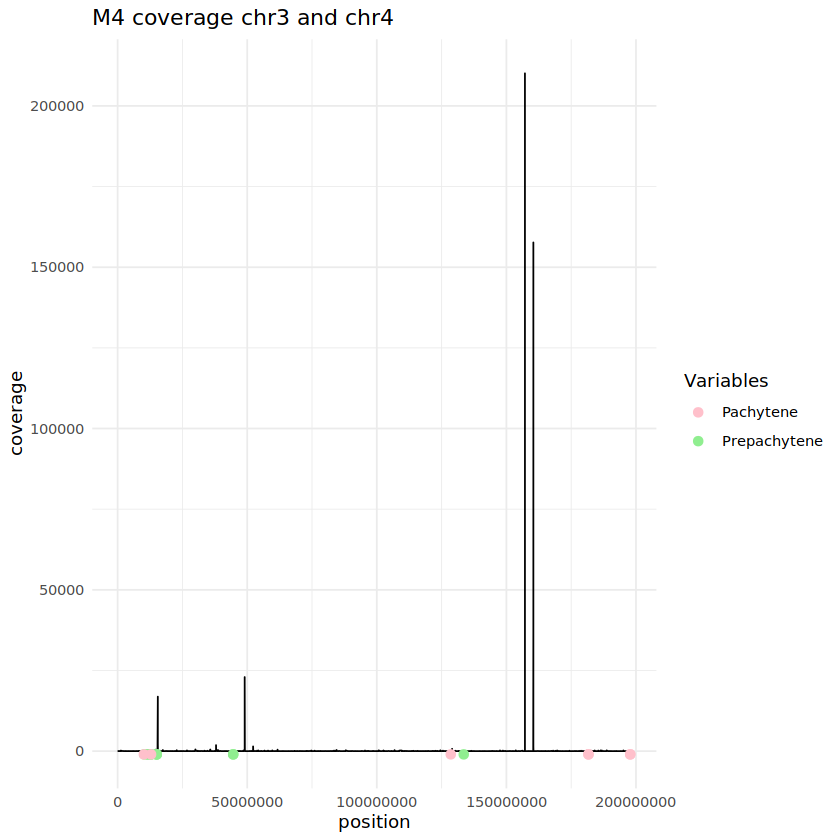

In [145]:
ggplot(chr1_data_both, aes(position, coverage)) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-1000, colour = factor(V5)),size=2.3)+
  theme_minimal()+
  scale_colour_manual(name="Variables", values=color)+
  ggtitle("M4 coverage chr3 and chr4")

In [146]:
chr1_coverage<- data_new %>% filter(CHROM %in% c("5","6"))
chr1_pre<- data_precursors %>% filter(UCSC_CHROM %in% c("chr5","chr6"))

In [147]:
chr1_data_both <- bind_rows(chr1_pre,chr1_coverage,.id = "df_id")
head(chr1_data_both)


df_id,UCSC_CHROM,V2,V3,V5,position,coverage,CHROM
1,chr6,34857041,35059190,Prepachytene,NA,NA,NA
1,chr6,38136226,38607700,Prepachytene,NA,NA,NA
1,chr6,41757633,41861898,Prepachytene,NA,NA,NA
1,chr6,41765382,41863099,Prepachytene,NA,NA,NA
1,chr6,158957467,159056460,Prepachytene,NA,NA,NA
1,chr5,14704912,14871887,Prepachytene,NA,NA,NA


In [148]:
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"
head(chr1_data_both)

df_id,UCSC_CHROM,start,end,V5,position,coverage,CHROM
1,chr6,34857041,35059190,Prepachytene,NA,NA,NA
1,chr6,38136226,38607700,Prepachytene,NA,NA,NA
1,chr6,41757633,41861898,Prepachytene,NA,NA,NA
1,chr6,41765382,41863099,Prepachytene,NA,NA,NA
1,chr6,158957467,159056460,Prepachytene,NA,NA,NA
1,chr5,14704912,14871887,Prepachytene,NA,NA,NA


Warning message:
“Removed 31 rows containing missing values (`geom_line()`).”Warning message:
“Removed 32316 rows containing missing values (`geom_point()`).”

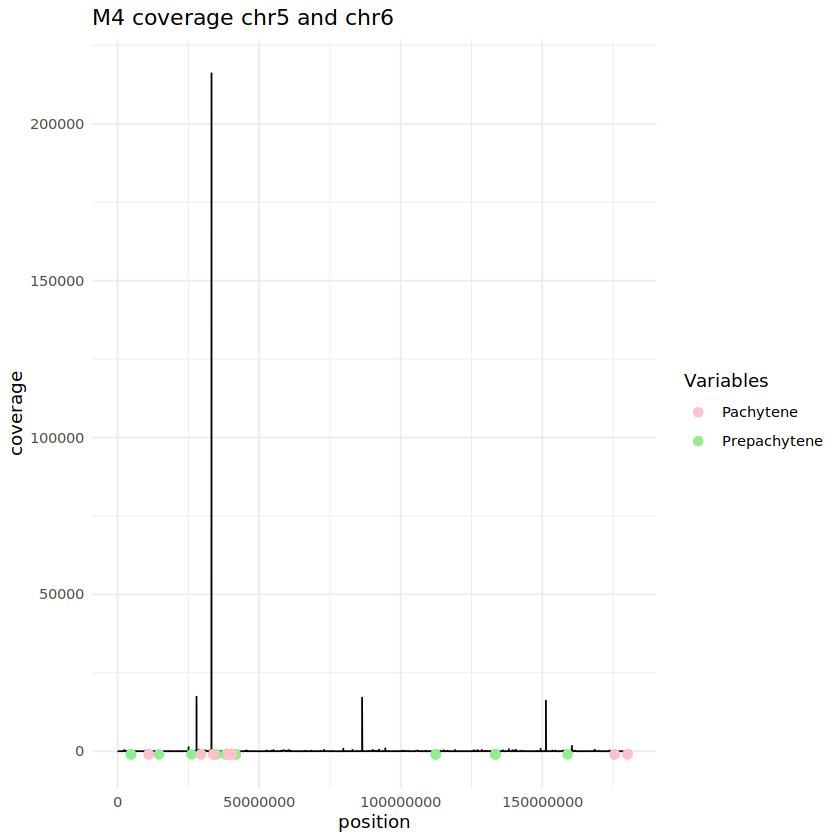

In [149]:
ggplot(chr1_data_both, aes(position, coverage)) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-1000, colour = factor(V5)),size=2.3)+
  theme_minimal()+
  scale_colour_manual(name="Variables", values=color)+
  ggtitle("M4 coverage chr5 and chr6")

In [150]:
chr1_coverage<- data_new %>% filter(CHROM %in% c("7","8"))
chr1_pre<- data_precursors %>% filter(UCSC_CHROM %in% c("chr7","chr8"))

In [151]:
chr1_data_both <- bind_rows(chr1_pre,chr1_coverage,.id = "df_id")
head(chr1_data_both)


df_id,UCSC_CHROM,V2,V3,V5,position,coverage,CHROM
1,chr7,43648093,43769104,Prepachytene,NA,NA,NA
1,chr7,56876906,56919663,Prepachytene,NA,NA,NA
1,chr7,56906322,56915619,Prepachytene,NA,NA,NA
1,chr8,356954,419111,Prepachytene,NA,NA,NA
1,chr8,356954,427967,Prepachytene,NA,NA,NA
1,chr8,28747911,28923021,Prepachytene,NA,NA,NA


In [152]:
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"
head(chr1_data_both)

df_id,UCSC_CHROM,start,end,V5,position,coverage,CHROM
1,chr7,43648093,43769104,Prepachytene,NA,NA,NA
1,chr7,56876906,56919663,Prepachytene,NA,NA,NA
1,chr7,56906322,56915619,Prepachytene,NA,NA,NA
1,chr8,356954,419111,Prepachytene,NA,NA,NA
1,chr8,356954,427967,Prepachytene,NA,NA,NA
1,chr8,28747911,28923021,Prepachytene,NA,NA,NA


Warning message:
“Removed 14 rows containing missing values (`geom_line()`).”Warning message:
“Removed 28370 rows containing missing values (`geom_point()`).”

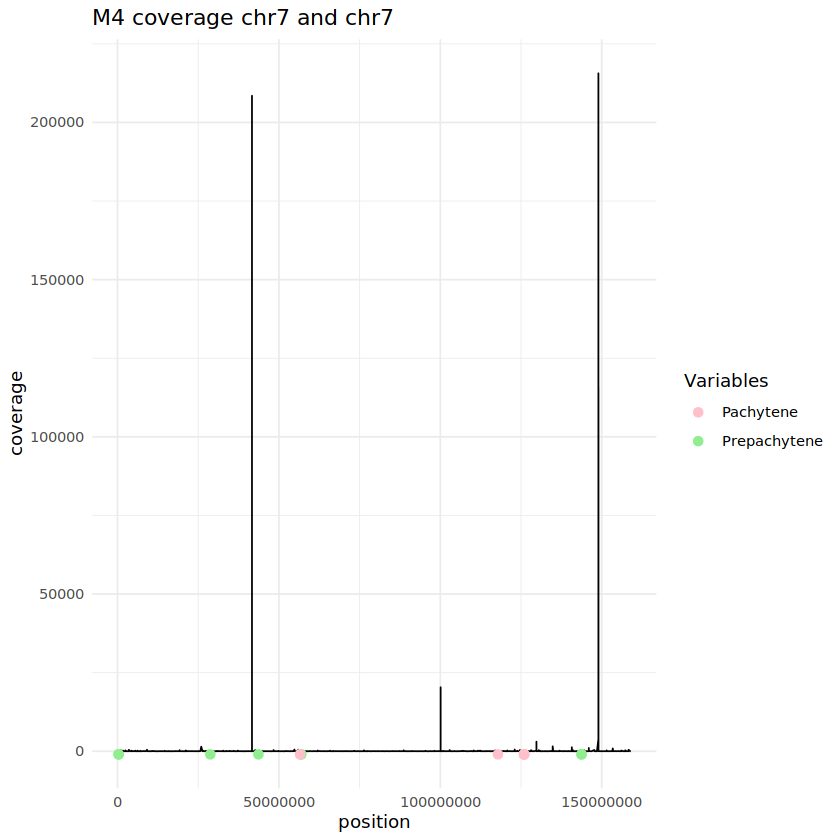

In [153]:
ggplot(chr1_data_both, aes(position, coverage)) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-1000, colour = factor(V5)),size=2.3)+
  theme_minimal()+
  scale_colour_manual(name="Variables", values=color)+
  ggtitle("M4 coverage chr7 and chr7")

In [101]:
chr1_coverage<- data_new %>% filter(CHROM %in% c("9","10"))
chr1_pre<- data_precursors %>% filter(UCSC_CHROM %in% c("chr9","chr10"))

In [102]:
chr1_data_both <- bind_rows(chr1_pre,chr1_coverage,.id = "df_id")
head(chr1_data_both)


df_id,UCSC_CHROM,V2,V3,V5,position,coverage,CHROM
1,chr9,37771563,37784710,Prepachytene,NA,NA,NA
1,chr9,37771563,37784710,Prepachytene,NA,NA,NA
1,chr9,37879411,37904370,Prepachytene,NA,NA,NA
1,chr9,84521747,84592004,Prepachytene,NA,NA,NA
1,chr9,84603686,84610171,Prepachytene,NA,NA,NA
1,chr9,88556060,88643954,Prepachytene,NA,NA,NA


In [103]:
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"
head(chr1_data_both)

df_id,UCSC_CHROM,start,end,V5,position,coverage,CHROM
1,chr9,37771563,37784710,Prepachytene,NA,NA,NA
1,chr9,37771563,37784710,Prepachytene,NA,NA,NA
1,chr9,37879411,37904370,Prepachytene,NA,NA,NA
1,chr9,84521747,84592004,Prepachytene,NA,NA,NA
1,chr9,84603686,84610171,Prepachytene,NA,NA,NA
1,chr9,88556060,88643954,Prepachytene,NA,NA,NA


Warning message:
“Removed 42 rows containing missing values (`geom_line()`).”Warning message:
“Removed 27365 rows containing missing values (`geom_point()`).”

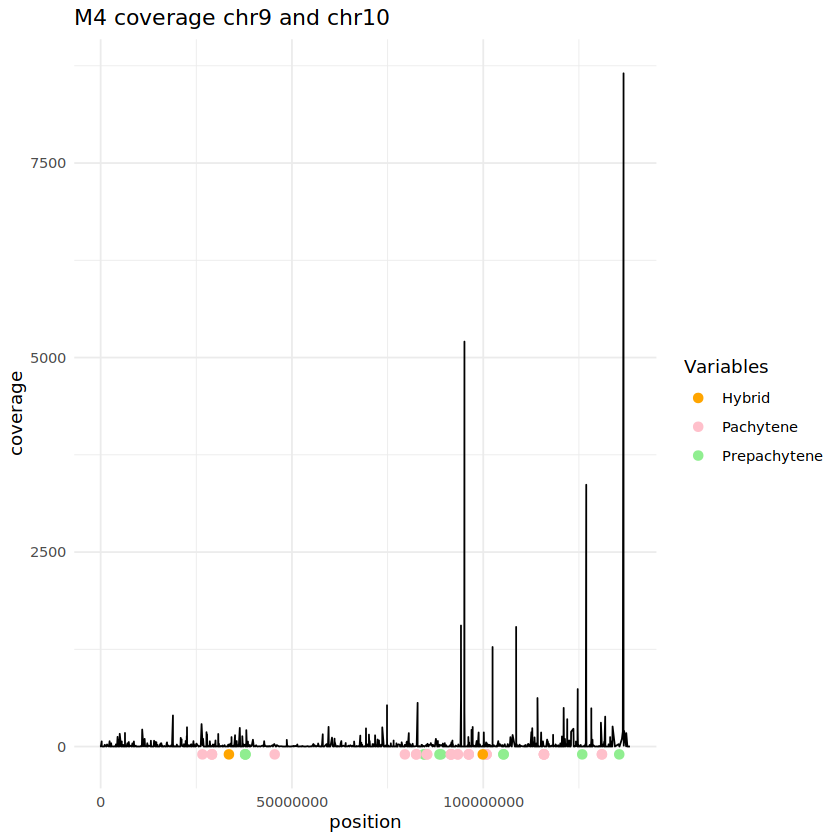

In [105]:
ggplot(chr1_data_both, aes(position, coverage)) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-100, colour = factor(V5)),size=2.3)+
  theme_minimal()+
  scale_colour_manual(name="Variables", values=color)+
  ggtitle("M4 coverage chr9 and chr10")

In [106]:
chr1_coverage<- data_new %>% filter(CHROM %in% c("11","12"))
chr1_pre<- data_precursors %>% filter(UCSC_CHROM %in% c("chr11","chr12"))

In [107]:
chr1_data_both <- bind_rows(chr1_pre,chr1_coverage,.id = "df_id")
head(chr1_data_both)


df_id,UCSC_CHROM,V2,V3,V5,position,coverage,CHROM
1,chr11,8040790,8127654,Prepachytene,NA,NA,NA
1,chr11,8103045,8127654,Prepachytene,NA,NA,NA
1,chr11,12696137,12966030,Prepachytene,NA,NA,NA
1,chr11,12696163,12785984,Prepachytene,NA,NA,NA
1,chr11,12696163,12966030,Prepachytene,NA,NA,NA
1,chr11,77926342,78128825,Prepachytene,NA,NA,NA


In [108]:
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"
head(chr1_data_both)

df_id,UCSC_CHROM,start,end,V5,position,coverage,CHROM
1,chr11,8040790,8127654,Prepachytene,NA,NA,NA
1,chr11,8103045,8127654,Prepachytene,NA,NA,NA
1,chr11,12696137,12966030,Prepachytene,NA,NA,NA
1,chr11,12696163,12785984,Prepachytene,NA,NA,NA
1,chr11,12696163,12966030,Prepachytene,NA,NA,NA
1,chr11,77926342,78128825,Prepachytene,NA,NA,NA


Warning message:
“Removed 33 rows containing missing values (`geom_line()`).”Warning message:
“Removed 26172 rows containing missing values (`geom_point()`).”

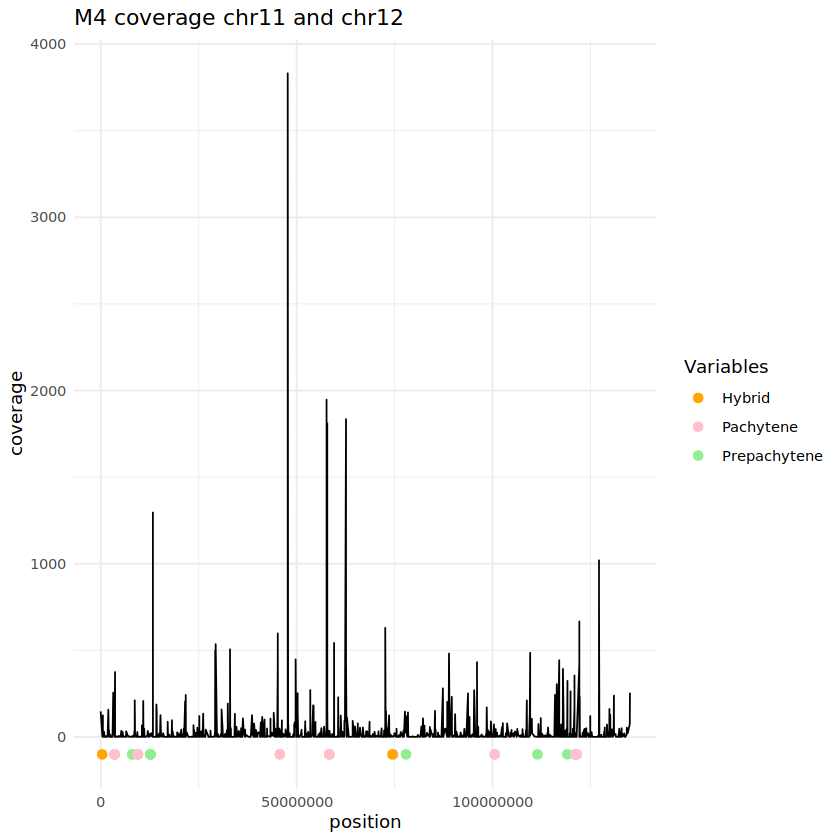

In [110]:
ggplot(chr1_data_both, aes(position, coverage)) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-100, colour = factor(V5)),size=2.3)+
  theme_minimal()+
  scale_colour_manual(name="Variables", values=color)+
  ggtitle("M4 coverage chr11 and chr12")

In [111]:
chr1_coverage<- data_new %>% filter(CHROM %in% c("13","14"))
chr1_pre<- data_precursors %>% filter(UCSC_CHROM %in% c("chr13","chr14"))

In [112]:
chr1_data_both <- bind_rows(chr1_pre,chr1_coverage,.id = "df_id")
head(chr1_data_both)


df_id,UCSC_CHROM,V2,V3,V5,position,coverage,CHROM
1,chr13,52158643,52340975,Prepachytene,NA,NA,NA
1,chr13,52158643,52340975,Prepachytene,NA,NA,NA
1,chr14,55833109,55878576,Prepachytene,NA,NA,NA
1,chr14,55833109,55878576,Prepachytene,NA,NA,NA
1,chr13,31912970,31948998,Pachytene,NA,NA,NA
1,chr14,88599262,88626935,Pachytene,NA,NA,NA


In [113]:
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"
head(chr1_data_both)

df_id,UCSC_CHROM,start,end,V5,position,coverage,CHROM
1,chr13,52158643,52340975,Prepachytene,NA,NA,NA
1,chr13,52158643,52340975,Prepachytene,NA,NA,NA
1,chr14,55833109,55878576,Prepachytene,NA,NA,NA
1,chr14,55833109,55878576,Prepachytene,NA,NA,NA
1,chr13,31912970,31948998,Pachytene,NA,NA,NA
1,chr14,88599262,88626935,Pachytene,NA,NA,NA


Warning message:
“Removed 7 rows containing missing values (`geom_line()`).”Warning message:
“Removed 18179 rows containing missing values (`geom_point()`).”

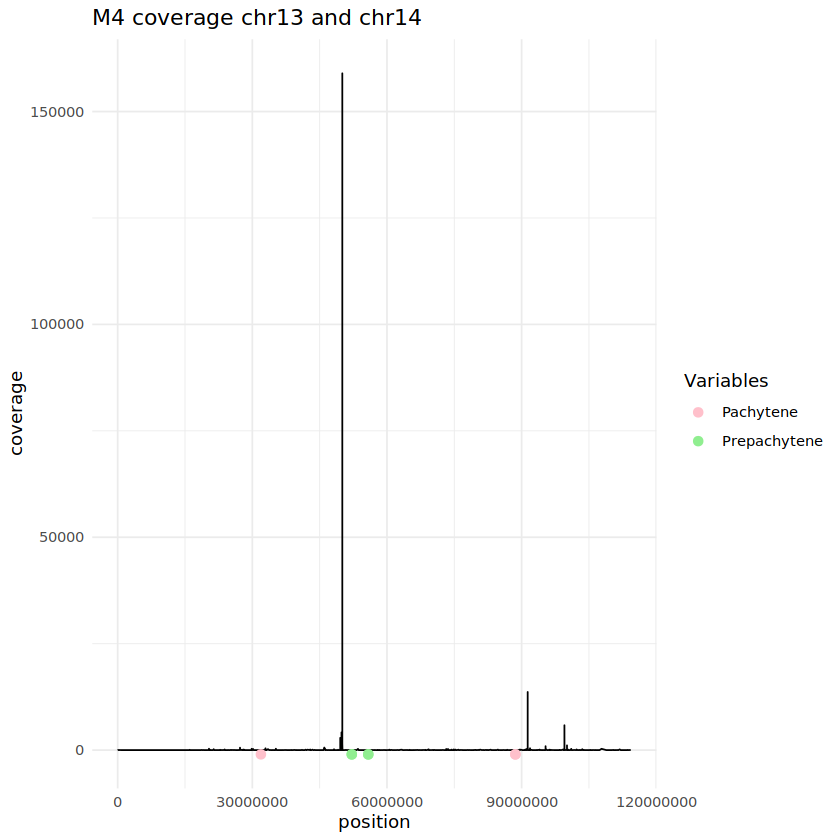

In [114]:
ggplot(chr1_data_both, aes(position, coverage)) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-1000, colour = factor(V5)),size=2.3)+
  theme_minimal()+
  scale_colour_manual(name="Variables", values=color)+
  ggtitle("M4 coverage chr13 and chr14")

In [115]:
chr1_coverage<- data_new %>% filter(CHROM %in% c("15","16"))
chr1_pre<- data_precursors %>% filter(UCSC_CHROM %in% c("chr15","chr16"))

In [116]:
chr1_data_both <- bind_rows(chr1_pre,chr1_coverage,.id = "df_id")
head(chr1_data_both)


df_id,UCSC_CHROM,V2,V3,V5,position,coverage,CHROM
1,chr15,34671268,34729640,Prepachytene,NA,NA,NA
1,chr15,34673611,34729667,Prepachytene,NA,NA,NA
1,chr15,34817504,34875814,Prepachytene,NA,NA,NA
1,chr15,43695258,43785369,Prepachytene,NA,NA,NA
1,chr15,85923945,86292586,Prepachytene,NA,NA,NA
1,chr15,86163180,86292589,Prepachytene,NA,NA,NA


In [117]:
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"
head(chr1_data_both)

df_id,UCSC_CHROM,start,end,V5,position,coverage,CHROM
1,chr15,34671268,34729640,Prepachytene,NA,NA,NA
1,chr15,34673611,34729667,Prepachytene,NA,NA,NA
1,chr15,34817504,34875814,Prepachytene,NA,NA,NA
1,chr15,43695258,43785369,Prepachytene,NA,NA,NA
1,chr15,85923945,86292586,Prepachytene,NA,NA,NA
1,chr15,86163180,86292589,Prepachytene,NA,NA,NA


Warning message:
“Removed 45 rows containing missing values (`geom_line()`).”Warning message:
“Removed 18640 rows containing missing values (`geom_point()`).”

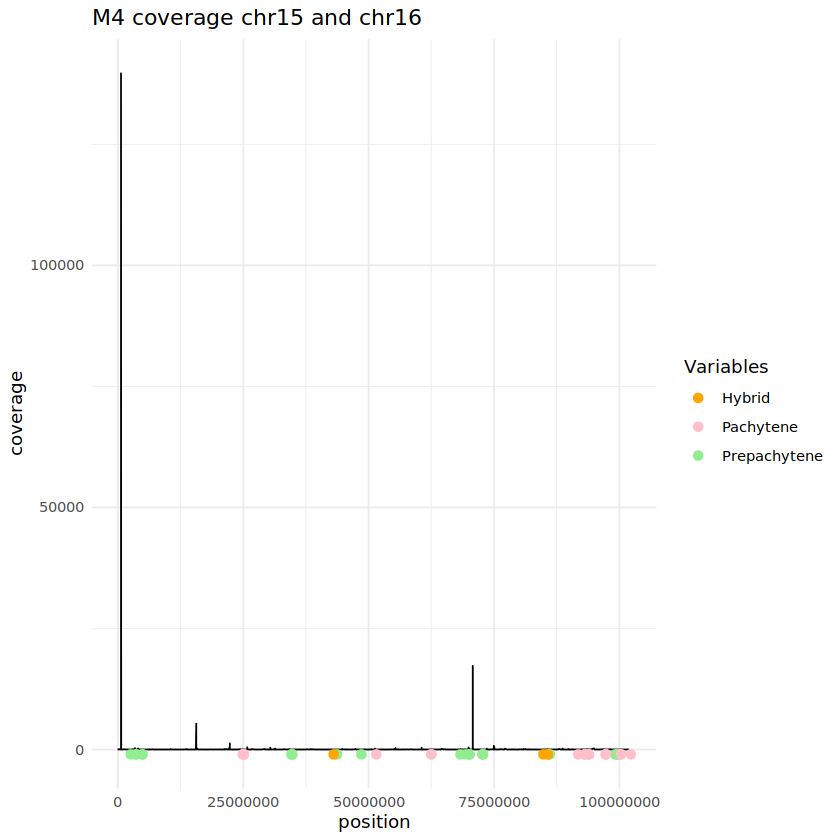

In [118]:
ggplot(chr1_data_both, aes(position, coverage)) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-1000, colour = factor(V5)),size=2.3)+
  theme_minimal()+
  scale_colour_manual(name="Variables", values=color)+
  ggtitle("M4 coverage chr15 and chr16")

In [119]:
chr1_coverage<- data_new %>% filter(CHROM %in% c("17","18"))
chr1_pre<- data_precursors %>% filter(UCSC_CHROM %in% c("chr17","chr18"))

In [120]:
chr1_data_both <- bind_rows(chr1_pre,chr1_coverage,.id = "df_id")
head(chr1_data_both)


df_id,UCSC_CHROM,V2,V3,V5,position,coverage,CHROM
1,chr17,4067200,4167272,Prepachytene,NA,NA,NA
1,chr17,20902905,20946352,Prepachytene,NA,NA,NA
1,chr17,36508127,36561846,Prepachytene,NA,NA,NA
1,chr17,36508127,36561846,Prepachytene,NA,NA,NA
1,chr17,45095089,45144854,Prepachytene,NA,NA,NA
1,chr17,66097695,66132070,Prepachytene,NA,NA,NA


In [121]:
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"
head(chr1_data_both)

df_id,UCSC_CHROM,start,end,V5,position,coverage,CHROM
1,chr17,4067200,4167272,Prepachytene,NA,NA,NA
1,chr17,20902905,20946352,Prepachytene,NA,NA,NA
1,chr17,36508127,36561846,Prepachytene,NA,NA,NA
1,chr17,36508127,36561846,Prepachytene,NA,NA,NA
1,chr17,45095089,45144854,Prepachytene,NA,NA,NA
1,chr17,66097695,66132070,Prepachytene,NA,NA,NA


Warning message:
“Removed 20 rows containing missing values (`geom_line()`).”Warning message:
“Removed 15948 rows containing missing values (`geom_point()`).”

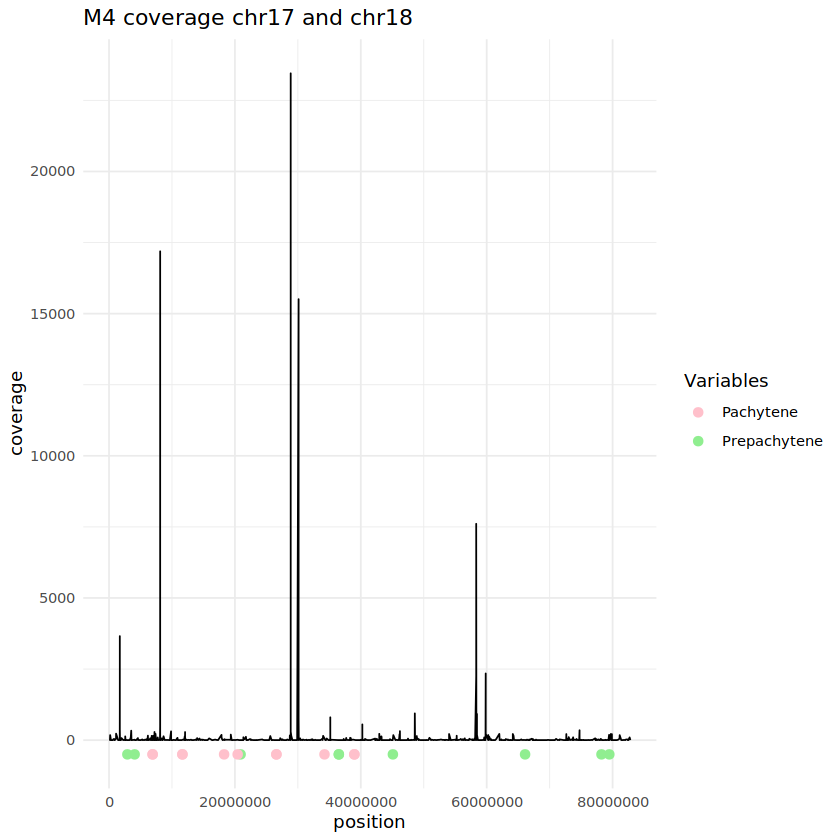

In [123]:
ggplot(chr1_data_both, aes(position, coverage)) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-500, colour = factor(V5)),size=2.3)+
  theme_minimal()+
  scale_colour_manual(name="Variables", values=color)+
  ggtitle("M4 coverage chr17 and chr18")

In [124]:
chr1_coverage<- data_new %>% filter(CHROM %in% c("19","20"))
chr1_pre<- data_precursors %>% filter(UCSC_CHROM %in% c("chr19","chr20"))

In [125]:
chr1_data_both <- bind_rows(chr1_pre,chr1_coverage,.id = "df_id")
head(chr1_data_both)


df_id,UCSC_CHROM,V2,V3,V5,position,coverage,CHROM
1,chr19,52901101,52926190,Prepachytene,NA,NA,NA
1,chr20,3907955,3996036,Prepachytene,NA,NA,NA
1,chr20,39807088,39928714,Prepachytene,NA,NA,NA
1,chr20,39807088,39928718,Prepachytene,NA,NA,NA
1,chr20,39807088,39946194,Prepachytene,NA,NA,NA
1,chr20,39807088,39946312,Prepachytene,NA,NA,NA


In [126]:
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"
head(chr1_data_both)

df_id,UCSC_CHROM,start,end,V5,position,coverage,CHROM
1,chr19,52901101,52926190,Prepachytene,NA,NA,NA
1,chr20,3907955,3996036,Prepachytene,NA,NA,NA
1,chr20,39807088,39928714,Prepachytene,NA,NA,NA
1,chr20,39807088,39928718,Prepachytene,NA,NA,NA
1,chr20,39807088,39946194,Prepachytene,NA,NA,NA
1,chr20,39807088,39946312,Prepachytene,NA,NA,NA


Warning message:
“Removed 21 rows containing missing values (`geom_line()`).”Warning message:
“Removed 13192 rows containing missing values (`geom_point()`).”

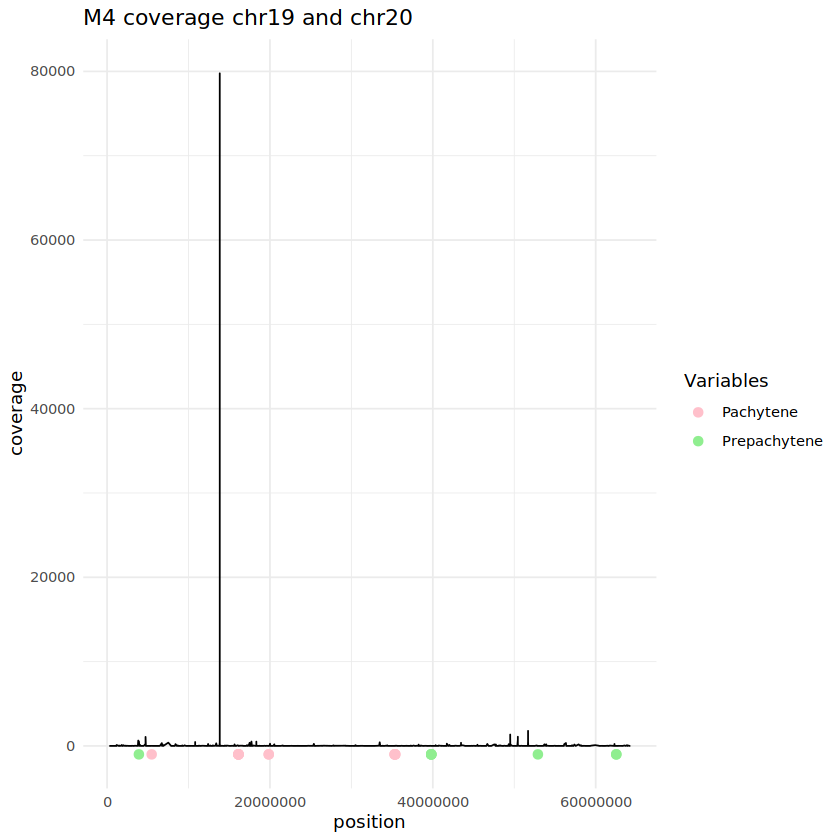

In [127]:
ggplot(chr1_data_both, aes(position, coverage)) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-1000, colour = factor(V5)),size=2.3)+
  theme_minimal()+
  scale_colour_manual(name="Variables", values=color)+
  ggtitle("M4 coverage chr19 and chr20")

In [128]:
chr1_coverage<- data_new %>% filter(CHROM %in% c("21","22"))
chr1_pre<- data_precursors %>% filter(UCSC_CHROM %in% c("chr21","chr22"))

In [129]:
chr1_data_both <- bind_rows(chr1_pre,chr1_coverage,.id = "df_id")
head(chr1_data_both)


df_id,UCSC_CHROM,V2,V3,V5,position,coverage,CHROM
1,chr22,42196682,42228212,Prepachytene,NA,NA,NA
1,chr22,50247948,50283726,Prepachytene,NA,NA,NA
1,chr21,45888744,45914095,Pachytene,NA,NA,NA
1,chr22,18985670,19007761,Pachytene,NA,NA,NA
1,chr22,24233382,24256273,Pachytene,NA,NA,NA
1,chr22,37748229,37767762,Pachytene,NA,NA,NA


In [130]:
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"
head(chr1_data_both)

df_id,UCSC_CHROM,start,end,V5,position,coverage,CHROM
1,chr22,42196682,42228212,Prepachytene,NA,NA,NA
1,chr22,50247948,50283726,Prepachytene,NA,NA,NA
1,chr21,45888744,45914095,Pachytene,NA,NA,NA
1,chr22,18985670,19007761,Pachytene,NA,NA,NA
1,chr22,24233382,24256273,Pachytene,NA,NA,NA
1,chr22,37748229,37767762,Pachytene,NA,NA,NA


Warning message:
“Removed 8 rows containing missing values (`geom_line()`).”Warning message:
“Removed 25676 rows containing missing values (`geom_point()`).”

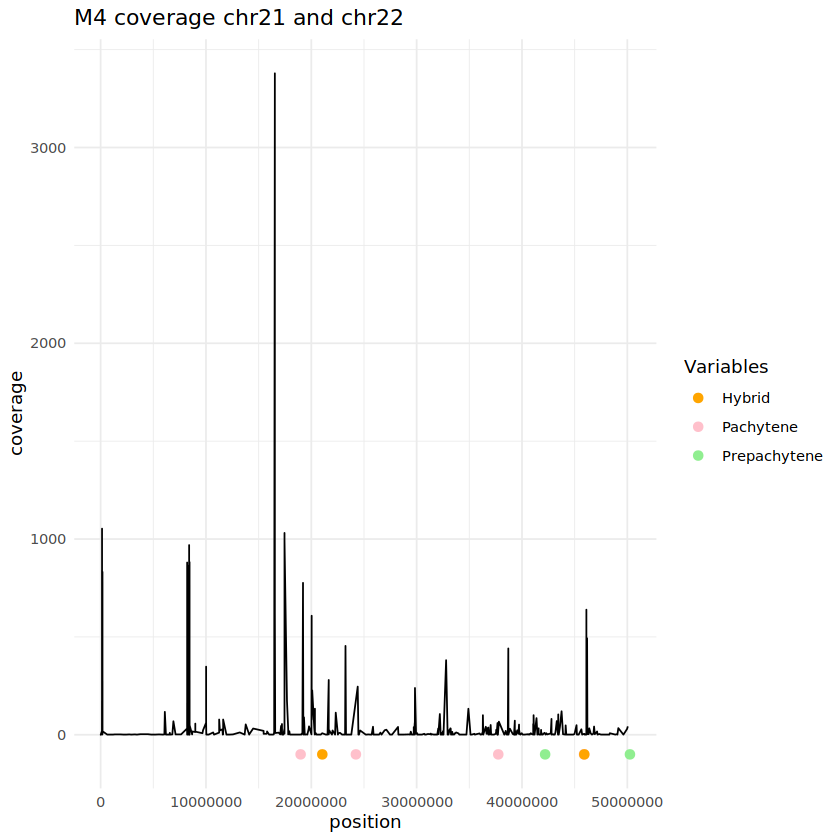

In [132]:
ggplot(chr1_data_both, aes(position, coverage)) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-100, colour = factor(V5)),size=2.3)+
  theme_minimal()+
  scale_colour_manual(name="Variables", values=color)+
  ggtitle("M4 coverage chr21 and chr22")

In [133]:
chr1_coverage<- data_new %>% filter(CHROM %in% c("X","Y"))
chr1_pre<- data_precursors %>% filter(UCSC_CHROM %in% c("chrX","chrY"))

In [134]:
chr1_data_both <- bind_rows(chr1_pre,chr1_coverage,.id = "df_id")
head(chr1_data_both)


df_id,UCSC_CHROM,V2,V3,V5,position,coverage,CHROM
1,chrX,9371369,9406642,Prepachytene,NA,NA,NA
1,chrX,9371369,9411541,Prepachytene,NA,NA,NA
1,chrX,53123338,53199982,Prepachytene,NA,NA,NA
1,chrX,53123338,53199995,Prepachytene,NA,NA,NA
2,NA,NA,NA,NA,366262,1,X
2,NA,NA,NA,NA,366263,1,X


In [135]:
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"
head(chr1_data_both)

df_id,UCSC_CHROM,start,end,V5,position,coverage,CHROM
1,chrX,9371369,9406642,Prepachytene,NA,NA,NA
1,chrX,9371369,9411541,Prepachytene,NA,NA,NA
1,chrX,53123338,53199982,Prepachytene,NA,NA,NA
1,chrX,53123338,53199995,Prepachytene,NA,NA,NA
2,NA,NA,NA,NA,366262,1,X
2,NA,NA,NA,NA,366263,1,X


Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”Warning message:
“Removed 17072 rows containing missing values (`geom_point()`).”

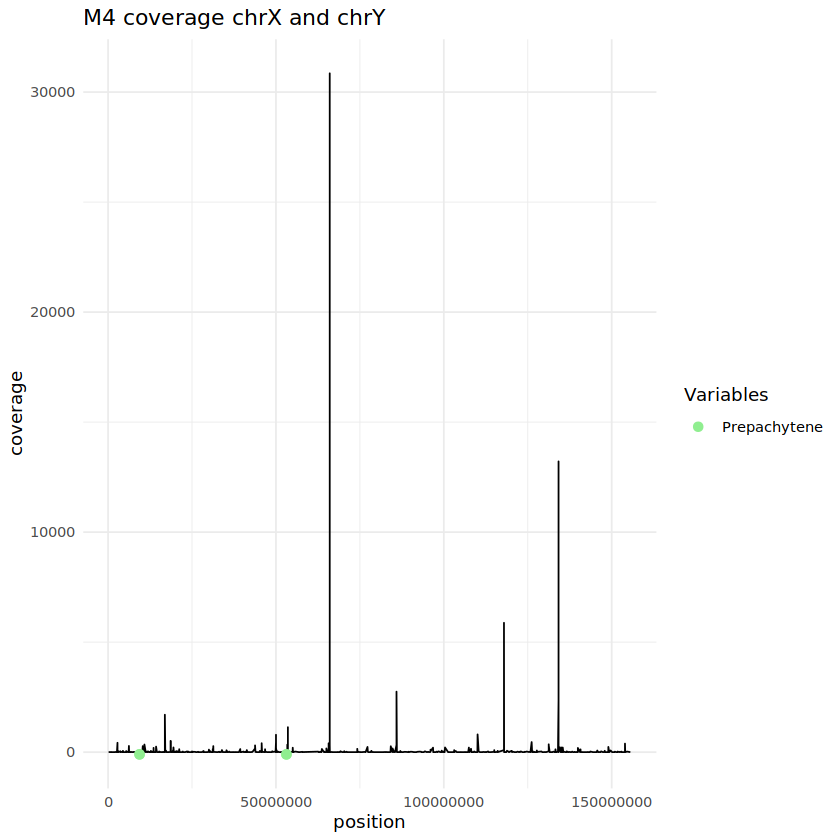

In [137]:
ggplot(chr1_data_both, aes(position, coverage)) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-100, colour = factor(V5)),size=2.3)+
  theme_minimal()+
  scale_colour_manual(name="Variables", values=color)+
  ggtitle("M4 coverage chrX and chrY")

In [155]:
setwd("~/smallRNAs/julia/short/map/M4")
intersect<- read.table("intersect_M4_h38.bed", header=FALSE,sep="\t")

In [158]:
nrow(intersect)
length(unique(intersect$V9))

[1] 1334

[1] 47

In [ ]:
# 

In [157]:
head(intersect)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
chr2,106886621,106886622,1,chr2,106801599,106887107,Prepachytene,pi-ST6GAL2,85508
chr2,106886622,106886623,1,chr2,106801599,106887107,Prepachytene,pi-ST6GAL2,85508
chr2,106886623,106886624,1,chr2,106801599,106887107,Prepachytene,pi-ST6GAL2,85508
chr2,106886624,106886625,1,chr2,106801599,106887107,Prepachytene,pi-ST6GAL2,85508
chr2,106886625,106886626,1,chr2,106801599,106887107,Prepachytene,pi-ST6GAL2,85508
chr2,106886626,106886627,1,chr2,106801599,106887107,Prepachytene,pi-ST6GAL2,85508
